In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, accuracy_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, cohen_kappa_score

from sklearn import ensemble, tree
from xgboost import XGBClassifier

from jupyterthemes import jtplot
jtplot.style(theme = "monokai", context = "notebook", ticks = True, grid = False)

script_start = time.time()

In [41]:
data = pd.read_csv("Churnscore Inputdata F-IT.csv", header = 0, index_col = 0, sep = ";")
data.head(5)

,month_n,cust_age,sales_net_eur,sales_net_eur_1,sales_net_eur_2,sales_net_eur_3,sales_net_eur_4,sales_net_eur_5,sales_net_eur_6,sales_net_eur_7,...,trend_1_increase,rev_0_grp,segment_24,rev_0_count,rev_not_0_count,turn_behav_counter,trend_counter,churn_36,prediction,prediction_01
rowid,,,,,,,,,,,,,,,,,,,,,
1,1,-1,0,0,0,0,0,0,0,0,...,0,1,1,16,0,5,5,1,"0,97725",1
2,1,0,"269,82",0,0,0,0,0,0,0,...,0,0,3,0,1,1,1,0,"0,98967",1
3,1,0,"1070,93",0,0,0,0,0,0,0,...,0,0,3,0,1,1,1,0,"0,17243",0
4,1,0,"2880,20997",0,0,0,0,0,0,0,...,0,0,3,0,1,1,1,0,"0,20407",0
5,1,0,"20513,6299",0,0,0,0,0,0,0,...,0,0,3,0,1,1,1,0,"-0,09169",0


In [16]:
data.describe()

,month_n,cust_age,rev_0_counter_24_months,rev_0_counter_12_months,rev_0_counter_6_months,rev_0_counter_3_months,salesorg_0002,salesorg_0200,salesorg_0430,salesorg_0230,...,trend_2_decrease,trend_0_constant,trend_1_increase,rev_0_grp,rev_0_count,rev_not_0_count,turn_behav_counter,trend_counter,churn_36,prediction_01
count,76181.000000,76181.000000,76181.000000,76181.000000,76181.000000,76181.000000,76181.0,76181.0,76181.0,76181.0,...,76181.000000,76181.000000,76181.000000,76181.000000,76181.000000,76181.000000,76181.000000,76181.000000,76181.000000,76181.000000
mean,6.522086,11.718946,9.891863,5.312991,2.741589,1.395427,0.0,0.0,0.0,0.0,...,0.378835,0.166616,0.351190,16.254315,3.801565,10.812854,3.790814,7.118783,0.287710,0.264712
std,3.437260,6.494141,8.151647,4.544294,2.418438,1.285520,0.0,0.0,0.0,0.0,...,0.485100,0.372635,0.477345,16.879862,6.229931,21.315424,3.208213,6.010816,0.452698,0.441182
min,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,7.000000,14.000000,9.000000,5.000000,2.000000,1.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,3.000000,6.000000,0.000000,0.000000
75%,10.000000,18.000000,18.000000,10.000000,5.000000,3.000000,0.0,0.0,0.0,0.0,...,1.000000,0.000000,1.000000,25.000000,5.000000,9.000000,5.000000,10.000000,1.000000,1.000000
max,12.000000,19.000000,23.000000,12.000000,6.000000,3.000000,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,88.000000,29.000000,89.000000,24.000000,62.000000,1.000000,1.000000


In [17]:
data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76181 entries, 1 to 76181
Data columns (total 180 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   month_n                         76181 non-null  int64 
 1   cust_age                        76181 non-null  int64 
 2   sales_net_eur                   76181 non-null  object
 3   sales_net_eur_1                 76181 non-null  object
 4   sales_net_eur_2                 76181 non-null  object
 5   sales_net_eur_3                 76181 non-null  object
 6   sales_net_eur_4                 76181 non-null  object
 7   sales_net_eur_5                 76181 non-null  object
 8   sales_net_eur_6                 76181 non-null  object
 9   sales_net_eur_7                 76181 non-null  object
 10  sales_net_eur_8                 76181 non-null  object
 11  sales_net_eur_9                 76181 non-null  object
 12  sales_net_eur_10                76181 non-nul

In [43]:
%%time
for col in data.columns:
        col_type = data[col].dtype
        if col_type != 'int64':
            data[col] = [re.sub(",", ".", str(x)) for x in data[col]]
            data[col] = data[col].astype(np.float64)
    
data.dtypes

Wall time: 6.36 s


month_n                 int64
cust_age                int64
sales_net_eur         float64
sales_net_eur_1       float64
sales_net_eur_2       float64
                       ...   
turn_behav_counter      int64
trend_counter           int64
churn_36                int64
prediction            float64
prediction_01           int64
Length: 180, dtype: object

In [44]:
#creating two datasets for modelling
df_equal_1 = data[data.segment_24 == 1].copy()
df_equal_1.drop(columns = data.filter(regex = ("salesorg*")), inplace = True)
df_equal_1.drop(columns = ['prediction', 'prediction_01'], inplace = True)

df_over_1 = data[data.segment_24 > 1].copy()
df_over_1.drop(columns = data.filter(regex = ("salesorg*")), inplace = True)
df_over_1.drop(columns = ['prediction', 'prediction_01'], inplace = True)

df_equal_1.info()
print('-'*70)
df_over_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67392 entries, 1 to 76181
Columns: 124 entries, month_n to churn_36
dtypes: float64(46), int64(78)
memory usage: 64.3 MB
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8789 entries, 2 to 76160
Columns: 124 entries, month_n to churn_36
dtypes: float64(46), int64(78)
memory usage: 8.4 MB


In [22]:
# Separating target column from other features
target = 'churn_36'
y_equal_1, y_over_1 = df_equal_1[target], df_over_1[target] #defining target
x_equal_1, x_over_1 = df_equal_1.drop(columns = target), df_over_1.drop(columns = target) #defining features

In [23]:
# Train and Test dataset splits
testing_size = 0.3

x_train_equal_1, x_test_equal_1, y_train_equal_1, y_test_equal_1 = train_test_split(x_equal_1, y_equal_1, test_size = testing_size, random_state = 42, stratify = y_equal_1)
x_train_over_1, x_test_over_1, y_train_over_1, y_test_over_1 = train_test_split(x_over_1, y_over_1, test_size = testing_size, random_state = 42, stratify = y_over_1)

Best Hyper Parameters: {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 200, 'random_state': 42}
GBT_equal_1 accuracy: 0.926
GBT_equal_1 cohen_kappa_score: 0.811
-------------------------------------------------------------------------------------------------------------- 


Best Hyper Parameters: {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 200, 'random_state': 42}
GBT_over_1 accuracy: 0.903
GBT_over_1 cohen_kappa_score: 0.790
-------------------------------------------------------------------------------------------------------------- 


AUC_equal_1: 0.9586
AUC_over_1: 0.9589


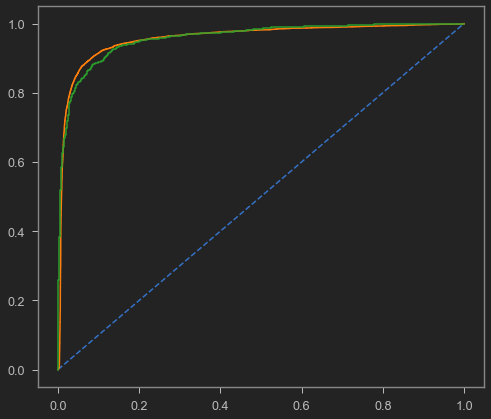

Wall time: 10min 15s


In [24]:
%%time
# gradient boosting tree model hyper-tuned
GBT = ensemble.GradientBoostingClassifier()

#Stratified K-Fold Cross Validation
params = {
          'n_estimators':[200], #default=100
          'max_depth':[8], #default=3
          'learning_rate': [0.5], #default=0.1
#           'max_features': ['auto', 'sqrt', 'log2'], #default=None. If None, then max_features=n_features.
          'random_state' : [42],
          }
#---------------------------------------------------------------------------------------------------------------------
GBT_model_equal_1 = GridSearchCV(GBT, param_grid = params, cv = 5, n_jobs = -1).fit(x_train_equal_1, y_train_equal_1) 
print("Best Hyper Parameters:",GBT_model_equal_1.best_params_)

GBT_predictions_equal_1 = GBT_model_equal_1.predict(x_test_equal_1)
GBT_accuracy_equal_1 = accuracy_score(y_test_equal_1, GBT_predictions_equal_1)
#The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.
print("GBT_equal_1 accuracy: %.3f" % GBT_accuracy_equal_1)

#The kappa score (see docstring) is a number between -1 and 1. Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).
print("GBT_equal_1 cohen_kappa_score: %.3f" % cohen_kappa_score(y_test_equal_1, GBT_predictions_equal_1))
print("-"*110,"\n\n")
#---------------------------------------------------------------------------------------------------------------------

GBT_model_over_1 = GridSearchCV(GBT, param_grid = params, cv = 5, n_jobs = -1).fit(x_train_over_1, y_train_over_1)
print("Best Hyper Parameters:",GBT_model_over_1.best_params_)

GBT_predictions_over_1 = GBT_model_over_1.predict(x_test_over_1)
GBT_accuracy_over_1 = accuracy_score(y_test_over_1, GBT_predictions_over_1)
#The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.
print("GBT_over_1 accuracy: %.3f" % GBT_accuracy_over_1)

#The kappa score (see docstring) is a number between -1 and 1. Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).
print("GBT_over_1 cohen_kappa_score: %.3f" % cohen_kappa_score(y_test_over_1, GBT_predictions_over_1))
print("-"*110,"\n\n")
#---------------------------------------------------------------------------------------------------------------------
# Area under the curve probability score
GBT_probs_equal_1 = GBT_model_equal_1.predict_proba(x_test_equal_1)
GBT_probs_equal_1 = GBT_probs_equal_1[:, 1]
GBT_auc_equal_1 = roc_auc_score(y_test_equal_1, GBT_probs_equal_1)
print('AUC_equal_1: %.4f' % GBT_auc_equal_1)

GBT_probs_over_1 = GBT_model_over_1.predict_proba(x_test_over_1)
GBT_probs_over_1 = GBT_probs_over_1[:, 1]
GBT_auc_over_1 = roc_auc_score(y_test_over_1, GBT_probs_over_1)
print('AUC_over_1: %.4f' % GBT_auc_over_1)

# AUC plot
GBT_fpr_equal_1, GBT_tpr_equal_1, GBT_thresholds_equal_1 = roc_curve(y_test_equal_1, GBT_probs_equal_1)
GBT_fpr_over_1, GBT_tpr_over_1, GBT_thresholds_over_1 = roc_curve(y_test_over_1, GBT_probs_over_1)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(GBT_fpr_equal_1, GBT_tpr_equal_1, color = 'tab:orange')
plt.plot(GBT_fpr_over_1, GBT_tpr_over_1, color = 'tab:green')
plt.show()

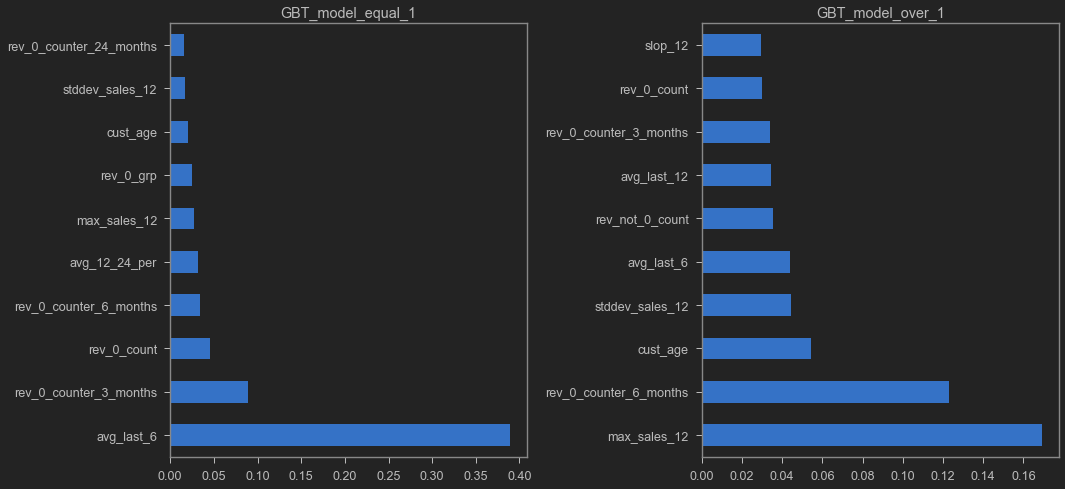

In [25]:
#feature importance
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

pd.Series(GBT_model_equal_1.best_estimator_.feature_importances_, index = x_equal_1.columns).nlargest(10).plot(kind='barh', ax = ax1)
ax1.set_title("GBT_model_equal_1")

pd.Series(GBT_model_over_1.best_estimator_.feature_importances_, index = x_over_1.columns).nlargest(10).plot(kind='barh', ax = ax2)
ax2.set_title("GBT_model_over_1")

plt.tight_layout()
plt.show()

In [26]:
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
# The recall is intuitively the ability of the classifier to find all the positive samples.
# The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
print("GBT_equal_1", classification_report(y_test_equal_1, GBT_predictions_equal_1))
print("-" * 100)
print("GBT_over_1", classification_report(y_test_over_1, GBT_predictions_over_1))

GBT_equal_1               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14642
           1       0.89      0.83      0.86      5576

    accuracy                           0.93     20218
   macro avg       0.92      0.90      0.91     20218
weighted avg       0.93      0.93      0.93     20218

----------------------------------------------------------------------------------------------------
GBT_over_1               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1637
           1       0.90      0.84      0.87      1000

    accuracy                           0.90      2637
   macro avg       0.90      0.89      0.90      2637
weighted avg       0.90      0.90      0.90      2637



GBT_equal_1 accuracy: 0.926
GBT_over_1 accuracy: 0.903


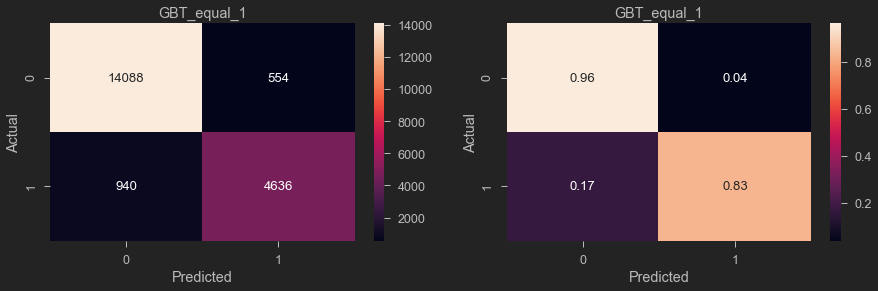

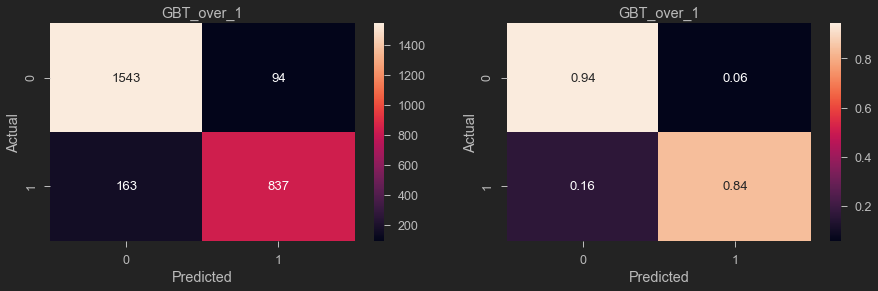

In [27]:
def conf_matrix(x, y, x_test, y_test):
    prediction = x.predict(x_test)
    CM_abs = confusion_matrix(y_test, prediction)
    CM_rel = confusion_matrix(y_test, prediction, normalize = 'true')

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    sns.heatmap(CM_abs, annot = True, fmt='d', ax = ax1)
    ax1.set(xlabel='Predicted', ylabel='Actual')
    ax1.set_title(y)
    
    sns.heatmap(CM_rel, annot = True, fmt='.2f', ax = ax2);
    ax2.set(xlabel='Predicted', ylabel='Actual')
    ax2.set_title(y)

    pred = accuracy_score(y_test, prediction)
    print(y + " accuracy: %.3f" % pred)
    
conf_matrix(GBT_model_equal_1, 'GBT_equal_1', x_test_equal_1, y_test_equal_1)  
conf_matrix(GBT_model_over_1, 'GBT_over_1', x_test_over_1, y_test_over_1)  

In [51]:
df_equal_1['prediction_grmk'] = GBT_model_equal_1.best_estimator_.predict(df_equal_1[x_test_equal_1.columns])
df_over_1['prediction_grmk'] = GBT_model_over_1.best_estimator_.predict(df_over_1[x_test_over_1.columns])

df_equal_1['probability_grmk'] = GBT_model_equal_1.best_estimator_.predict_proba(df_equal_1[x_test_equal_1.columns])[:,1]
df_equal_1['probability_grmk'] = df_equal_1['probability_grmk'].round(3)


df_over_1['probability_grmk'] = GBT_model_over_1.best_estimator_.predict_proba(df_over_1[x_test_over_1.columns])[:,1]
df_over_1['probability_grmk'] = df_over_1['probability_grmk'].round(3)

final_df = df_over_1.append(df_equal_1, ignore_index = False)
final_df = pd.merge(final_df,  data[['prediction', 'prediction_01']], left_index = True, right_index = True)
final_df = final_df.sort_index(axis = 0)

final_df

,month_n,cust_age,sales_net_eur,sales_net_eur_1,sales_net_eur_2,sales_net_eur_3,sales_net_eur_4,sales_net_eur_5,sales_net_eur_6,sales_net_eur_7,...,segment_24,rev_0_count,rev_not_0_count,turn_behav_counter,trend_counter,churn_36,prediction_grmk,probability_grmk,prediction,prediction_01
rowid,,,,,,,,,,,,,,,,,,,,,
1,1,-1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.0,16,0,5,5,1,1,0.999,0.97725,1
2,1,0,269.82000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.0,0,1,1,1,0,0,0.001,0.98967,1
3,1,0,1070.93000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.0,0,1,1,1,0,0,0.002,0.17243,0
4,1,0,2880.20997,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.0,0,1,1,1,0,0,0.110,0.20407,0
5,1,0,20513.62990,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.0,0,1,1,1,0,0,0.000,-0.09169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76177,12,18,81158.16998,104911.52020,89924.49000,96110.94985,48458.69981,89589.54989,71212.01022,85084.11019,...,1.0,0,84,3,24,0,0,0.000,0.01743,0
76178,12,18,91897.74033,61118.41970,76370.54998,161636.29060,61500.40976,62949.99064,61764.53988,92632.16951,...,1.0,0,72,5,7,0,0,0.000,0.01308,0
76179,12,18,127969.28920,120752.35170,186322.50810,141822.72860,85806.98045,127172.55940,176443.86780,134749.03030,...,1.0,0,84,5,9,0,0,0.000,0.00697,0


In [57]:
final_df.to_csv("Churn_Scoring_Final_Results_GRMK.csv", sep = ";")
print("Final file exported!")

Excel file exported!


In [29]:
script_end = time.time() 
time_delta = round(script_end - script_start, 2)

print("Script running time: ", time.strftime('%H:%M:%S', time.gmtime(time_delta)))

Script running time:  00:10:24
